In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [8]:
from sqlalchemy import inspect
inspector = inspect(engine)
inspector.get_table_names()
columns1 = inspector.get_columns('measurement')
columns2 = inspector.get_columns('station')
for (column1,column2) in zip(columns1,columns2):
    print (column1["name"], column1["type"], "-"*10, column2["name"], column2["type"])

id INTEGER ---------- id INTEGER
station TEXT ---------- station TEXT
date TEXT ---------- name TEXT
prcp FLOAT ---------- latitude FLOAT
tobs FLOAT ---------- longitude FLOAT


In [9]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results
import datetime as dt
from datetime import datetime
ld = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
ldm1y = datetime.strptime(ld[0], '%Y-%m-%d')- dt.timedelta(days=365)

#option 1: using BETWEEN and a dictionary
lastyr = engine.execute("SELECT * FROM measurement WHERE prcp IS NOT NULL AND date BETWEEN :ldm1y AND \
                                :ld ORDER BY date DESC", {'ld':ld[0], 'ldm1y': ldm1y}).fetchall()

#option 2: using > last data point - 1 yr (ldm1y)
#lastyr = engine.execute("SELECT * FROM measurement WHERE prcp IS NOT NULL AND date > :ldm1y ORDER BY date DESC",\
#                        {'ldm1y': ldm1y}).fetchall()

#option 3: 
#lastyr = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > ld).\
#             order_by(Measurement.date).all()
lastyr

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (2721, 'USC00519397', '2017-08-20', 0.0, 81.0),
 (7633, 'USC00514830', '2017-08-20', 0.01, 80.0),
 (2720, 'USC00519397', '2017-08-19', 0.0, 79.0),
 (7632, 'USC00514830', '2017-08-19', 0.0, 80.0),
 (19546, 'USC00516128', '2017-08-19', 0.09, 71.0),
 (2719, 'USC00519397', '2017-08-18', 0.0, 80.0),
 (7631, 'USC00514830', '2017-08-18', 0.0, 77.0),
 (14959, 'USC00519281', '2017-08-18', 0.06, 79.0),
 (7630, 'USC00514830', '2017-08-17', 0.0, 78.0),
 (12183, 'USC00519523', '2017-08-17', 0.05, 83.0),
 (14

Text(0.5, 1.0, 'Precipitation vs. Date 04/18/2019')

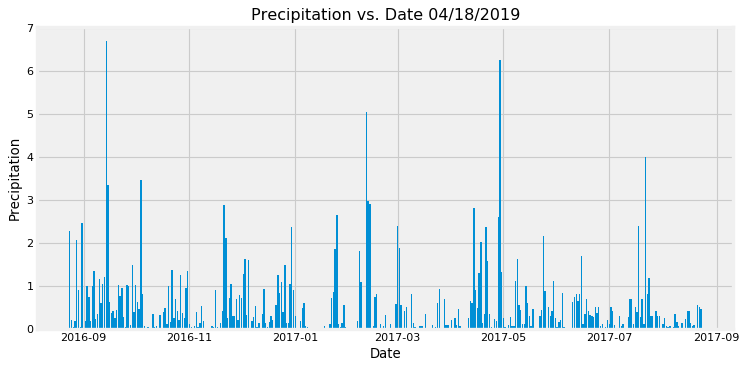

In [10]:
import datetime as dt
from datetime import datetime

_datestr = [x[2] for x in lastyr]
_dateobj = [datetime.strptime(x, '%Y-%m-%d') for x in _datestr]
_precp = [x[3] for x in lastyr]

fig, ax = plt.subplots(num=3, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
l1=ax.bar(_dateobj, _precp, label="precipitation")
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation')
plt.title(f"Precipitation vs. Date {datetime.now().strftime('%m/%d/%Y')}")


# Exploratory Climate Analysis

In [11]:
# Calculate the date 1 year ago from the last data point in the database
ldm1y=_dateobj[0]- dt.timedelta(days=365)
print(ldm1y)

2016-08-23 00:00:00


In [12]:
# Perform a query to retrieve the date and precipitation scores
precp_date = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > ldm1y).\
            order_by(Measurement.date.desc()).all()
precp_date

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precp_date)

# Sort the dataframe by date
df.set_index('date', inplace=True, )
df.head()

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


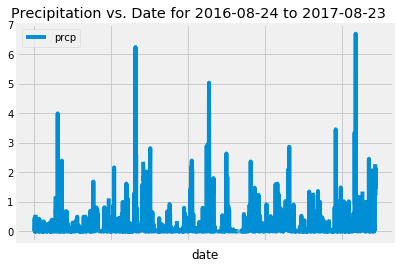

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(title=f'Precipitation vs. Date for {df.index[-1]} to {df.index[0]}   ')

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
# Design a query to show how many stations are available in this dataset?
#option 1 (Naiive): just count the statinos without checking out if there are the ame stations in Staiton and Measurmeent tables
#session.query(Measurement.station).distinct().count()

# Option 2: since we are not sure if there are exactly the same stations in measurment and Station tables, we run two queries and select the distinc values
st1 = session.query(Measurement.station).distinct().all()
stat1 = [x[0] for x in st1]
st2 = session.query(Station.station).distinct().all()
stat2 = [x[0] for x in st2]
len(set(stat1 + stat2))
list(set(stat1 + stat2))

['USC00519397',
 'USC00511918',
 'USC00519523',
 'USC00518838',
 'USC00516128',
 'USC00519281',
 'USC00514830',
 'USC00517948',
 'USC00513117']

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
from sqlalchemy import func
station_date = session.query(Measurement.station, func.count(Measurement.date)).\
                group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).all()
st = [x[0] for x in station_date]
ct = [x[1] for x in station_date]
for x,y in zip(st,ct):
    print(f'station_name: {x}, activity_count: {y}')
print(f'\nThe busiest station was: {st[0]}')

station_name: USC00519281, activity_count: 2772
station_name: USC00519397, activity_count: 2724
station_name: USC00513117, activity_count: 2709
station_name: USC00519523, activity_count: 2669
station_name: USC00516128, activity_count: 2612
station_name: USC00514830, activity_count: 2202
station_name: USC00511918, activity_count: 1979
station_name: USC00517948, activity_count: 1372
station_name: USC00518838, activity_count: 511

The busiest station was: USC00519281


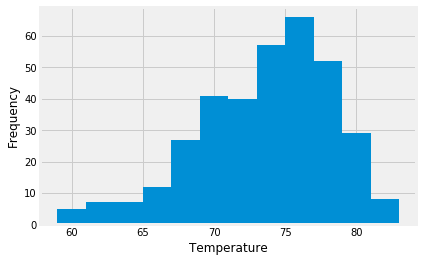

In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
from sqlalchemy import and_
temp_date = session.query(Measurement.date, Measurement.tobs).\
            filter(and_(Measurement.date > ldm1y, Measurement.station == st[0])).\
            order_by(Measurement.date).all()
temp_date_df=pd.DataFrame(temp_date)
plt.hist(temp_date_df.tobs,12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Optional Challenge Assignment

## Optional 1) Temperature Analysis


* The starter notebook contains a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.

* Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").

* Plot the min, avg, and max temperature from your previous query as a bar chart.

* Use the average temperature as the bar height.
* Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

#### First, user inputs the lanned trip arrival and departure dates with the specified format (i.e., month-day)

In [24]:
arrive= input("Please input month and day of arrival: ").split('-')
depart= input("Please input month and day of departure: ").split('-')

Please input month and day of arrival: 05-28
Please input month and day of departure: 06-15


In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [26]:
lsyrtemp=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= ldm1y).all()
dtobs = []
for d,temp in lsyrtemp:
    dt_dict = {}
    dt_dict["date"] = d
    dt_dict["temperature"] = temp
    dtobs.append(dt_dict)
dtobs

[{'date': '2016-08-24', 'temperature': 79.0},
 {'date': '2016-08-25', 'temperature': 80.0},
 {'date': '2016-08-26', 'temperature': 79.0},
 {'date': '2016-08-27', 'temperature': 77.0},
 {'date': '2016-08-28', 'temperature': 78.0},
 {'date': '2016-08-29', 'temperature': 78.0},
 {'date': '2016-08-30', 'temperature': 79.0},
 {'date': '2016-08-31', 'temperature': 80.0},
 {'date': '2016-09-01', 'temperature': 81.0},
 {'date': '2016-09-02', 'temperature': 80.0},
 {'date': '2016-09-03', 'temperature': 79.0},
 {'date': '2016-09-04', 'temperature': 75.0},
 {'date': '2016-09-05', 'temperature': 79.0},
 {'date': '2016-09-06', 'temperature': 76.0},
 {'date': '2016-09-07', 'temperature': 76.0},
 {'date': '2016-09-08', 'temperature': 80.0},
 {'date': '2016-09-09', 'temperature': 79.0},
 {'date': '2016-09-10', 'temperature': 78.0},
 {'date': '2016-09-11', 'temperature': 76.0},
 {'date': '2016-09-12', 'temperature': 78.0},
 {'date': '2016-09-13', 'temperature': 78.0},
 {'date': '2016-09-14', 'temperatu

In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station? (mas)
mas = engine.execute("SELECT min(tobs), max(tobs), avg(tobs) FROM measurement WHERE station = :st", 
                        {'st':st[0]}).fetchall()
print(f'Minimum_Temp: {mas[0][0]}, Maximum_Temp: {mas[0][1]}, Mean_Temp: {mas[0][2]}')

Minimum_Temp: 54.0, Maximum_Temp: 85.0, Mean_Temp: 71.66378066378067


In [28]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
Arrival = dt.date(2017, int(arrive[0]), int(arrive[1]))
Departure = dt.date(2017, int(depart[0]), int(depart[1]))

print(calc_temps(Arrival, Departure))

[(71.0, 77.23529411764706, 83.0)]


In [30]:
Arrival.strftime('%m-%d-%Y')

'05-28-2017'

In [35]:
A='08-01-2014'; B=A.split('-')
ch='-'
ch.join([B[2],B[0],B[1]])

'2014-08-01'

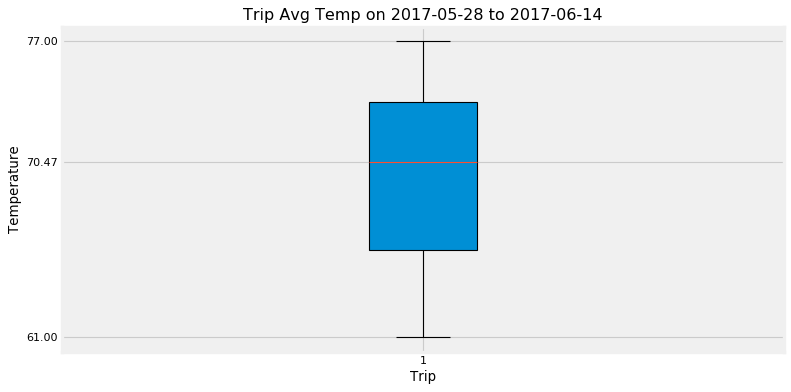

In [70]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
temp_str = ['Min', 'Mean', 'Max']
#xs = np.arange(len(temp_str)) 
xs=[1]
ys=[calc_temps('2017-02-15', '2017-02-29')[0][i] for i in range(3)]
fig, ax = plt.subplots(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
l1=ax.boxplot(ys,patch_artist=True)
#plt.xticks(xs, temp_str) 
plt.yticks(ys)
ax.set_title(f'Trip Avg Temp on {Arrival} to {Departure}')
ax.set_ylabel("Temperature")
ax.set_xlabel("Trip")
fig.tight_layout()
plt.show()

## Optional 2) Daily Rainfall Average.

* Calculate the rainfall per weather station using the previous year's matching dates.
* Calculate the daily normals. Normals are the averages for the min, avg, and max temperatures.
*  You are provided with a function called daily_normals that will calculate the daily normals for a specific date. This date string will be in the format %m-%d. Be sure to use all historic tobs that match that date string.
* Create a list of dates for your trip in the format %m-%d. Use the daily_normals function to calculate the normals for each date string and append the results to a list.
* Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.
* Use Pandas to plot an area plot (stacked=False) for the daily normals.

In [71]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [30]:
# Creating the list of trips dates based on the specified format as required by the dialy_normals function 
# and append the temps list
temps=[]
dates=[]
for i,x in enumerate(range((Departure-Arrival).days + 1)):
    temps.append(daily_normals((Arrival + dt.timedelta(x)).strftime('%m-%d')))
    dates.append((Arrival + dt.timedelta(x)).strftime('%Y-%m-%d'))

[[(64.0, 74.19607843137256, 80.0)],
 [(69.0, 74.33333333333333, 81.0)],
 [(68.0, 74.4, 81.0)],
 [(64.0, 74.6140350877193, 81.0)],
 [(65.0, 74.4, 81.0)],
 [(65.0, 74.03448275862068, 80.0)],
 [(65.0, 73.81818181818181, 81.0)],
 [(68.0, 74.85454545454546, 81.0)],
 [(70.0, 75.17543859649123, 80.0)],
 [(68.0, 75.07142857142857, 81.0)],
 [(70.0, 75.58620689655173, 81.0)],
 [(69.0, 75.15254237288136, 81.0)],
 [(68.0, 75.14285714285714, 81.0)],
 [(69.0, 76.01960784313725, 84.0)],
 [(66.0, 75.66666666666667, 83.0)],
 [(68.0, 75.66666666666667, 81.0)],
 [(69.0, 75.62711864406779, 81.0)]]

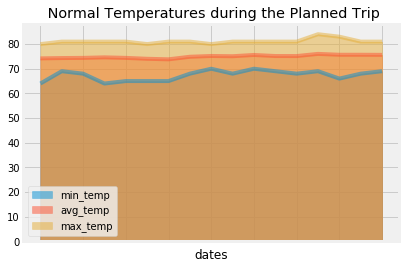

In [48]:
# Load data to Pandas and plot
rd_df= pd.DataFrame({'dates': dates, 
                     'min_temp':[i[0][0] for i in temps],
                     'avg_temp':[i[0][1] for i in temps],
                     'max_temp':[i[0][2] for i in temps]})
rd_df.set_index('dates', inplace=True)
rd_df.plot.area(stacked=False, title='Normal Temperatures during the Planned Trip')